## Visualize data for US election


#### Data 

Initially I saw the data at [usda/county-level-data-sets | data.world](https://data.world/usda/county-level-data-sets), originally from [USDA ERS - County-level Data Sets](http://www.ers.usda.gov/data-products/county-level-data-sets.aspx) in :

- [Education.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Education.xls)
- [PovertyEstimates.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//PovertyEstimates.xls)
- [Unemployment.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Unemployment.xls)
- [PopulationEstimates.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//PopulationEstimates.xls)

#### Useful links

- [Mapping the U.S. Census population estimates for incorporated places with CartoDB and geopandas](http://blog.danwin.com/census-places-cartodb-geopandas-mapping/)

- [GeoJSON and KML data for the United States](http://eric.clst.org/Stuff/USGeoJSON)


In [31]:
# %load https://gist.githubusercontent.com/kidpixo/2ec078d09834b5aa7869/raw/350f79fe4f2e09592404a76db18dcc01a961444b/ipython_inizialization.py
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os
import urllib
import sys

In [3]:
# from http://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [4]:
import geopandas as gpd

In [7]:
# files from [GeoJSON and KML data for the United States](http://eric.clst.org/Stuff/USGeoJSON)
fname = "gz_2010_us_040_00_20m.json"
geodf = gpd.GeoDataFrame(gpd.read_file(fname))
# see [Managing Projections — GeoPandas 0.2-py3.5.egg documentation](http://geopandas.org/projections.html)
geodf.crs =  {'init': 'epsg:4326'}
geodf.index = geodf.NAME

In [35]:
# check local demographic_data, if not present download.

def dlProgress(count, blockSize, totalSize):
    import os
    import sys
    # protect the indicator for file with totalSize smaller than blockSize.
    if blockSize < totalSize:
        percent = int(count*blockSize*100/totalSize)
    else:
        percent = 100
#     sys.stdout.write("\n%s %s %s %s" % (count, blockSize, totalSize, percent)) # debugging
    sys.stdout.write("\r[" + os.path.basename(act_file) + "][%d%%][%s>%s]" % (percent,'-'*(percent/10),' '*(10-percent/10)))
    sys.stdout.flush()

demographic_data_local_path  = 'CountyLevel_Data_Sets_Download_Data__18026/'
if not os.path.exists(demographic_data_path):
    os.makedirs(demographic_data_path)


demographic_data_files = ['Education.xls','Unemployment.xls']
demographic_data_remote_path = 'http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//'

for act_file in demographic_data_files:
    act_filepath     = demographic_data_local_path+act_file
    act_filepath_rel = demographic_data_remote_path+act_file
    print act_file, 
    if os.path.isfile(act_filepath) and os.access(act_filepath, os.R_OK):
        print " - File exists and is readable :\n ",act_filepath_rel
    else:
        print " - File doesn't exists or is not readable, downloading to: \n"+act_filepath_rel
        urllib.urlretrieve(act_filepath_rel, filename=act_filepath, reporthook=dlProgress)
    print

Education.xls
File doesn't exists or is not readable, downloading to: 
http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Education.xls
[Education.xls][100%][---------->]
Unemployment.xls
File doesn't exists or is not readable, downloading to: 
http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Unemployment.xls
[Unemployment.xls][100%][---------->]


In [52]:
# education data
edu = pd.read_excel(demographic_data_local_path+'Education.xls', skiprows=3, header=1)
edu.drop(edu[edu.State == 'US'].index, axis=0,inplace=True, errors='raise') # drop global data for US
edu['NAME'] = edu.State.apply(lambda x: states[x]) # create an expanded NAME columns

# unemployment data
une = pd.read_excel(demographic_data_local_path+'Unemployment.xls', skiprows=5, header=1)
# une.drop(0, axis=0,inplace=True, errors='raise') # drop global data for US
# une['NAME'] = edu.State.apply(lambda x: states[x]) # create an expanded NAME columns

In [90]:
census = pd.merge(edu,  une, left_on='FIPS Code', right_on='FIPS_Code', suffixes=('_edu','_une'))
census['State'] = census['State_edu']
census.drop(['State_edu','State_une'],axis=1, inplace=True)

In [98]:
# aggregate states
census_state = census.groupby('State').mean()
census_state.index = census_state.index.map(lambda x: states[x])

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970",...,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
Alaska,2156.515152,7.259259,9.407407,7.586207,10.034483,3956.272727,4536.181818,1792.818182,1704.500000,48.227273,...,25136.241379,23429.379310,1706.862069,9.762069,24994.896552,23390.068966,1604.827586,8.934483,60539.866667,85.393333
Alabama,1066.014706,4.805970,4.477612,4.641791,4.388060,31244.294118,13772.617647,4008.441176,4174.588235,65.158824,...,63568.132353,59243.676471,4324.455882,7.907353,63122.470588,59270.382353,3852.088235,7.025000,38627.014706,90.001471


In [258]:
# Merge on County Level
# # strip  ' County' and ' Municipio' from Area Name
# import re
# census['Area name'] = census['Area name'].apply(lambda x: re.sub(' County','',re.sub(' Municipio','',x,1),1))
# pd.merge(census, nyt_results, left_on=['NAME','Area name'], right_on=['State','Place']).head()

In [102]:
nyt_results = pd.read_csv('nytimes_presidential_elections_2016_results_county.csv')

In [111]:
nyt_results['total_votes'] = nyt_results[['Clinton','Trump']].sum(axis=1)
nyt_results['Clinton'] = nyt_results['Clinton']/nyt_results['total_votes']
nyt_results['Trump']   = nyt_results['Trump']/nyt_results['total_votes']

In [119]:
# aggregate states
nyt_results_state = nyt_results[['Trump','State']].groupby('State').mean()

In [155]:
geo_edu = pd.merge(geodf, census_state, left_index=True, right_index=True)
geo_edu = pd.merge(geo_edu, nyt_results_state, left_index=True, right_index=True)

In [156]:
for col in geo_edu.columns:
    print col

CENSUSAREA
GEO_ID
LSAD
NAME
STATE
geometry
FIPS Code
2003 Rural-urban Continuum Code
2003 Urban Influence Code
2013 Rural-urban Continuum Code
2013 Urban Influence Code
Less than a high school diploma, 1970
High school diploma only, 1970
Some college (1-3 years), 1970
Four years of college or higher, 1970
Percent of adults with less than a high school diploma, 1970
Percent of adults with a high school diploma only, 1970
Percent of adults completing some college (1-3 years), 1970
Percent of adults completing four years of college or higher, 1970
Less than a high school diploma, 1980
High school diploma only, 1980
Some college (1-3 years), 1980
Four years of college or higher, 1980
Percent of adults with less than a high school diploma, 1980
Percent of adults with a high school diploma only, 1980
Percent of adults completing some college (1-3 years), 1980
Percent of adults completing four years of college or higher, 1980
Less than a high school diploma, 1990
High school diploma only, 199

35708.6144578 72127.6818182
Alabama           38627.014706
Arizona           43493.687500
Arkansas          37627.381579
California        56149.084746
Colorado          52539.169231
Connecticut       70370.000000
Delaware          58018.000000
Florida           44134.750000
Georgia           41260.631250
Hawaii            63844.000000
Idaho             45811.844444
Illinois          51015.660194
Indiana           49448.645161
Iowa              51728.440000
Kansas            48876.886792
Kentucky          39713.884298
Louisiana         41751.707692
Maine             45794.058824
Maryland          67533.160000
Massachusetts     65586.733333
Michigan          45003.023810
Minnesota         54600.488636
Mississippi       35708.614458
Missouri          41580.956897
Montana           44155.736842
Nebraska          49570.489362
Nevada            54603.277778
New Hampshire     60703.818182
New Jersey        72127.681818
New Mexico        40746.882353
New York          54388.269841
North Carol

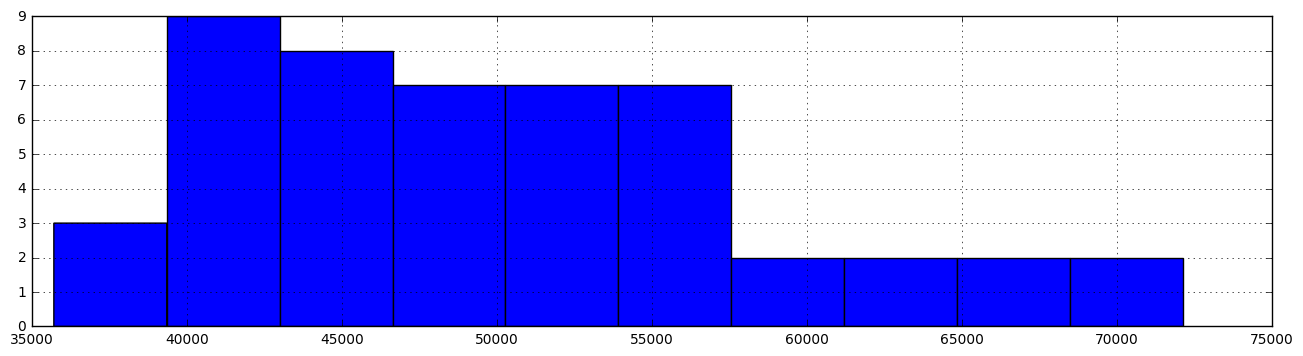

In [147]:
col = u'Median_Household_Income_2014'
print geo_edu[col].min(), geo_edu[col].max()
print geo_edu[col]
geo_edu[col].hist(figsize=[16,4])

In [136]:
print axbb
print [axbb[3]+shift,axbb[1],cbar_width,axbb[3]-axbb[1]]

[ 0.125       0.125       0.9         0.47727273]
[0.50227272727272732, 0.12500000000000011, 0.05, 0.35227272727272724]


vmin, vmax =  4.55277299931 4.8581019742
cbar_vmin, cbar_vmax =  35708.6144578 72127.6818182


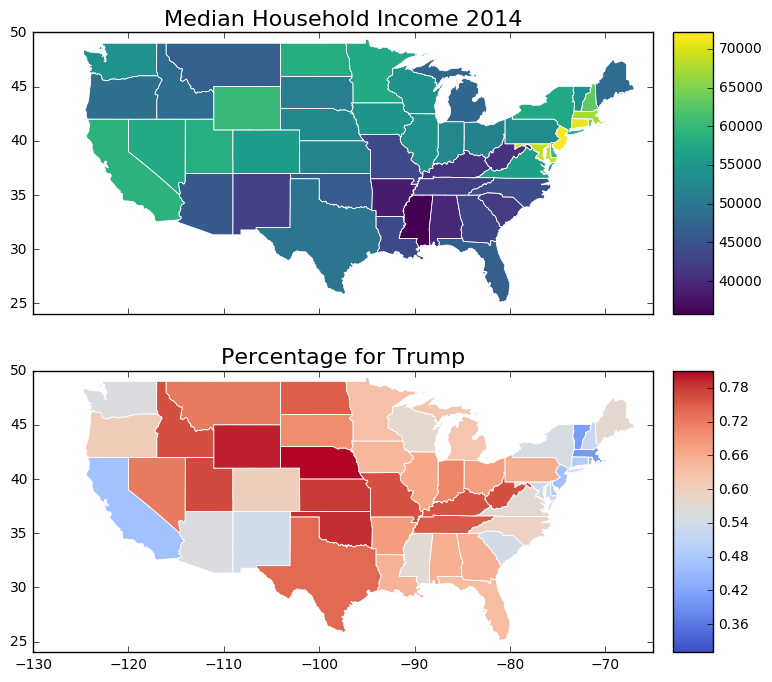

In [149]:
geo_edu['color'] = geo_edu[col].apply(np.log10)

cmap = 'viridis'
vmin = geo_edu['color'].min()
vmax = geo_edu['color'].max()
cbar_vmin = geo_edu[col].min()
cbar_vmax = geo_edu[col].max()

print 'vmin, vmax = ',vmin, vmax
print 'cbar_vmin, cbar_vmax = ',cbar_vmin, cbar_vmax

fig, ax = plt.subplots(3,1,figsize=[8,8], sharex=True, sharey=True)

g = geo_edu.plot(column='color',cmap=cmap, edgecolor='white',
                 linewidth = 0.5,vmin=vmin, vmax=vmax, ax=ax[0], alpha=1)
g.set_xlim([-130,-65])
g.set_ylim([24,50])
# add colorbar
axbb = np.array(ax[0].get_position()).flatten()
shift = 0.025
cbar_width = 0.05
cax = fig.add_axes([axbb[2]+shift,axbb[1],cbar_width,axbb[3]-axbb[1]])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=cbar_vmin, vmax=cbar_vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)
ax[0].set_title(col.replace('_', ' '), fontsize=16)

g = geo_edu.plot(column='Trump',cmap='coolwarm', edgecolor='white',linewidth = 0.5, ax=ax[1], alpha=1)
# add colorbar
axbb = np.array(ax[1].get_position()).flatten()
shift = 0.025
cbar_width = 0.05
cax = fig.add_axes([axbb[2]+shift,axbb[1],cbar_width,axbb[3]-axbb[1]])
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=geo_edu['Trump'].min(), vmax=geo_edu['Trump'].max()))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)
ax[1].set_title('Percentage for Trump', fontsize=16)


Screenshot from [2016 Election Results: President Live Map by State, Real-Time Voting Updates - POLITICO](http://www.politico.com/2016-election/results/map/president)

![2016_Election_Results](2016_Election_Results.png)

In [259]:
import seaborn as sns

subdf = geo_edu[['Trump',
                 'Unemployed_2015',
#                  'Unemployment_rate_2015',
#                  'Civilian_labor_force_2015',
#                  'Employed_2015',
                  'Median_Household_Income_2014',
                   "Less than a high school diploma, 2010-2014",
#                  "High school diploma only, 2010-2014",
#                  "Some college or associate's degree, 2010-2014",
                  "Bachelor's degree or higher, 2010-2014"
                ]]

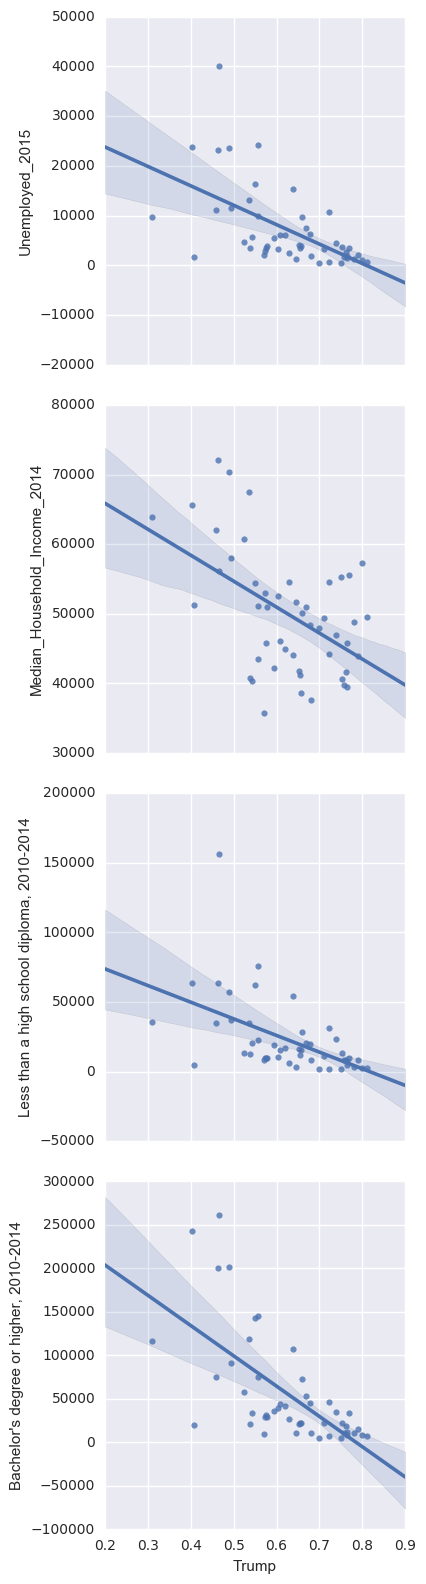

In [269]:
# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(subdf, x_vars="Trump",
                 y_vars=subdf.columns[1:],
                 size=4)
# Draw a seaborn pointplot onto each Axes
g.map(sns.regplot)
sns.despine(fig=g.fig, left=True)